In [132]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras # to build Neural Network
from sklearn.metrics import accuracy_score

# **Function**

In [133]:
def get_file_size(file_path):
    size = os.path.getsize(file_path)
    return size

In [134]:
def convert_bytes(size, unit=None):
    if unit == "KB":
        return print('File size: ' + str(round(size / 1024, 3)) + ' Kilobytes')
    elif unit == "MB":
        return print('File size: ' + str(round(size / (1024 * 1024), 3)) + ' Megabytes')
    else:
        return print('File size: ' + str(size) + ' bytes')

# **Import Dataset**

In [135]:
'''
Label	Description
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot 
'''

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data() # load dataset from  keras

# **EXPLORE THE DATA**

In [136]:
# Print shape of Data

X_train.shape, y_train.shape, "******", X_test.shape, y_test.shape

((60000, 28, 28), (60000,), '******', (10000, 28, 28), (10000,))

In [137]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [138]:
y_train[0] #9 => Ankle boot

9

In [139]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

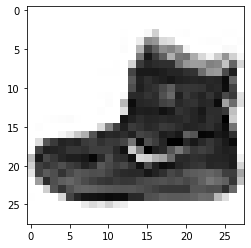

In [140]:
plt.imshow(X_train[0], cmap='Greys')

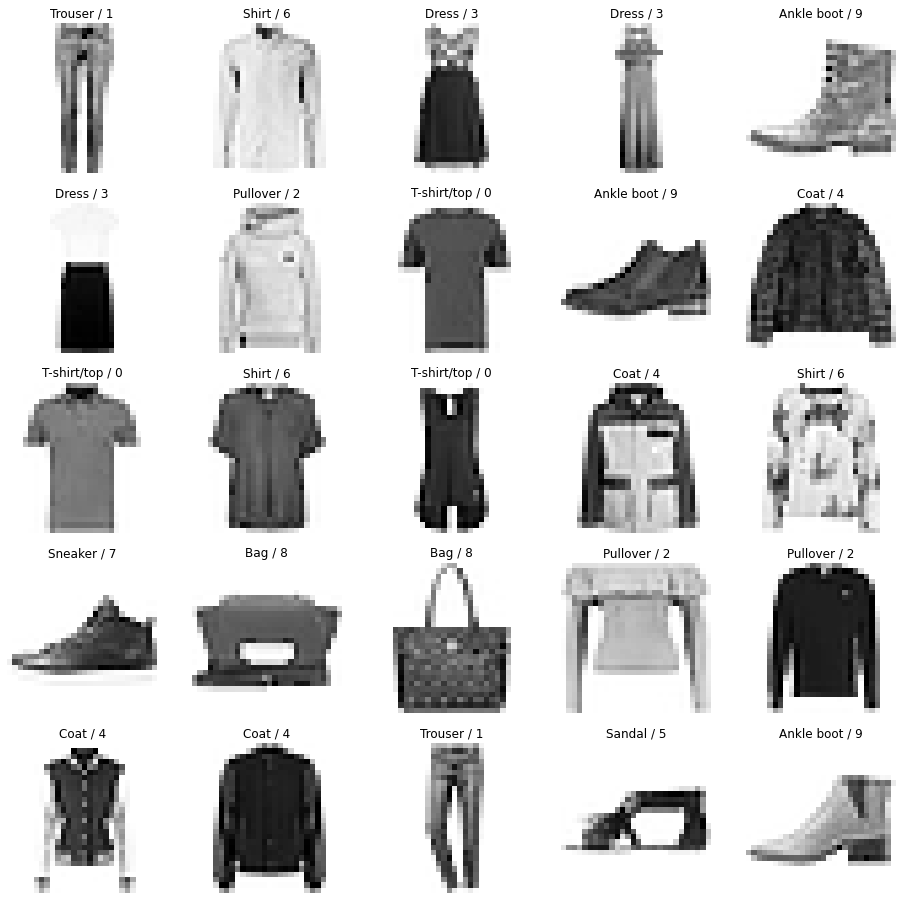

In [141]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0, 1000, 25):
  plt.subplot(5,5,j)
  j+=1
  plt.imshow(X_train[i], cmap="Greys")
  plt.axis('off') # off the axis
  plt.title('{} / {}'.format(class_labels[y_train[i]], y_train[i]))

# **TEST DATASET**

In [142]:
X_train.shape

(60000, 28, 28)

In [143]:
X_train.ndim

3

# **PREPROCESSING**

In [144]:
# expected conv2d_input to have 4 dimensions, but got array with shape (28, 28, 1)
# so we have increase the dimention 3 to 4
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

# ref: https://numpy.org/doc/stable/reference/generated/numpy.expand_dims.html

In [145]:
X_train.ndim

4

In [146]:
X_train = X_train/255
X_test = X_test/255

In [147]:
from sklearn.model_selection import train_test_split 
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size= 0.2, random_state=2020)

In [148]:
X_train.shape,  y_train.shape, X_validation.shape, y_validation.shape

((48000, 28, 28, 1), (48000,), (12000, 28, 28, 1), (12000,))

In [149]:
X_train.shape,  y_train.shape, X_validation.shape, y_validation.shape

((48000, 28, 28, 1), (48000,), (12000, 28, 28, 1), (12000,))

# **BUILD MODEL**

In [150]:
cnn_model = keras.models.Sequential([
                         tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                         tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                         tf.keras.layers.Flatten(),
                         tf.keras.layers.Dense(units=128, activation='relu'),
                         tf.keras.layers.Dropout(0.25),
                         tf.keras.layers.Dense(units=256, activation='relu'),
                         tf.keras.layers.Dropout(0.25),
                         tf.keras.layers.Dense(units=128, activation='relu'),
                         tf.keras.layers.Dense(units=10, activation='softmax')
                         ])

In [151]:
# complie the model
cnn_model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

#Train the Model
cnn_model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=1, validation_data=(X_validation, y_validation))

Epoch 1/20
3000/3000 [==============================] - 52s 17ms/step - loss: 0.5575 - accuracy: 0.7938 - val_loss: 0.3817 - val_accuracy: 0.8590
Epoch 2/20
3000/3000 [==============================] - 48s 16ms/step - loss: 0.3648 - accuracy: 0.8679 - val_loss: 0.3297 - val_accuracy: 0.8802
Epoch 3/20
3000/3000 [==============================] - 47s 16ms/step - loss: 0.3175 - accuracy: 0.8837 - val_loss: 0.3284 - val_accuracy: 0.8888
Epoch 4/20
3000/3000 [==============================] - 47s 16ms/step - loss: 0.2948 - accuracy: 0.8934 - val_loss: 0.3217 - val_accuracy: 0.8882
Epoch 5/20
3000/3000 [==============================] - 47s 16ms/step - loss: 0.2710 - accuracy: 0.9009 - val_loss: 0.2860 - val_accuracy: 0.8987
Epoch 6/20
3000/3000 [==============================] - 47s 16ms/step - loss: 0.2564 - accuracy: 0.9061 - val_loss: 0.2984 - val_accuracy: 0.8976
Epoch 7/20
3000/3000 [==============================] - 48s 16ms/step - loss: 0.2473 - accuracy: 0.9089 - val_loss: 0.2831 -

In [68]:
y_pred = cnn_model.predict(X_test)

In [69]:
cnn_model.evaluate(X_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.3363 - accuracy: 0.9005


[0.33633941411972046, 0.9004999995231628]

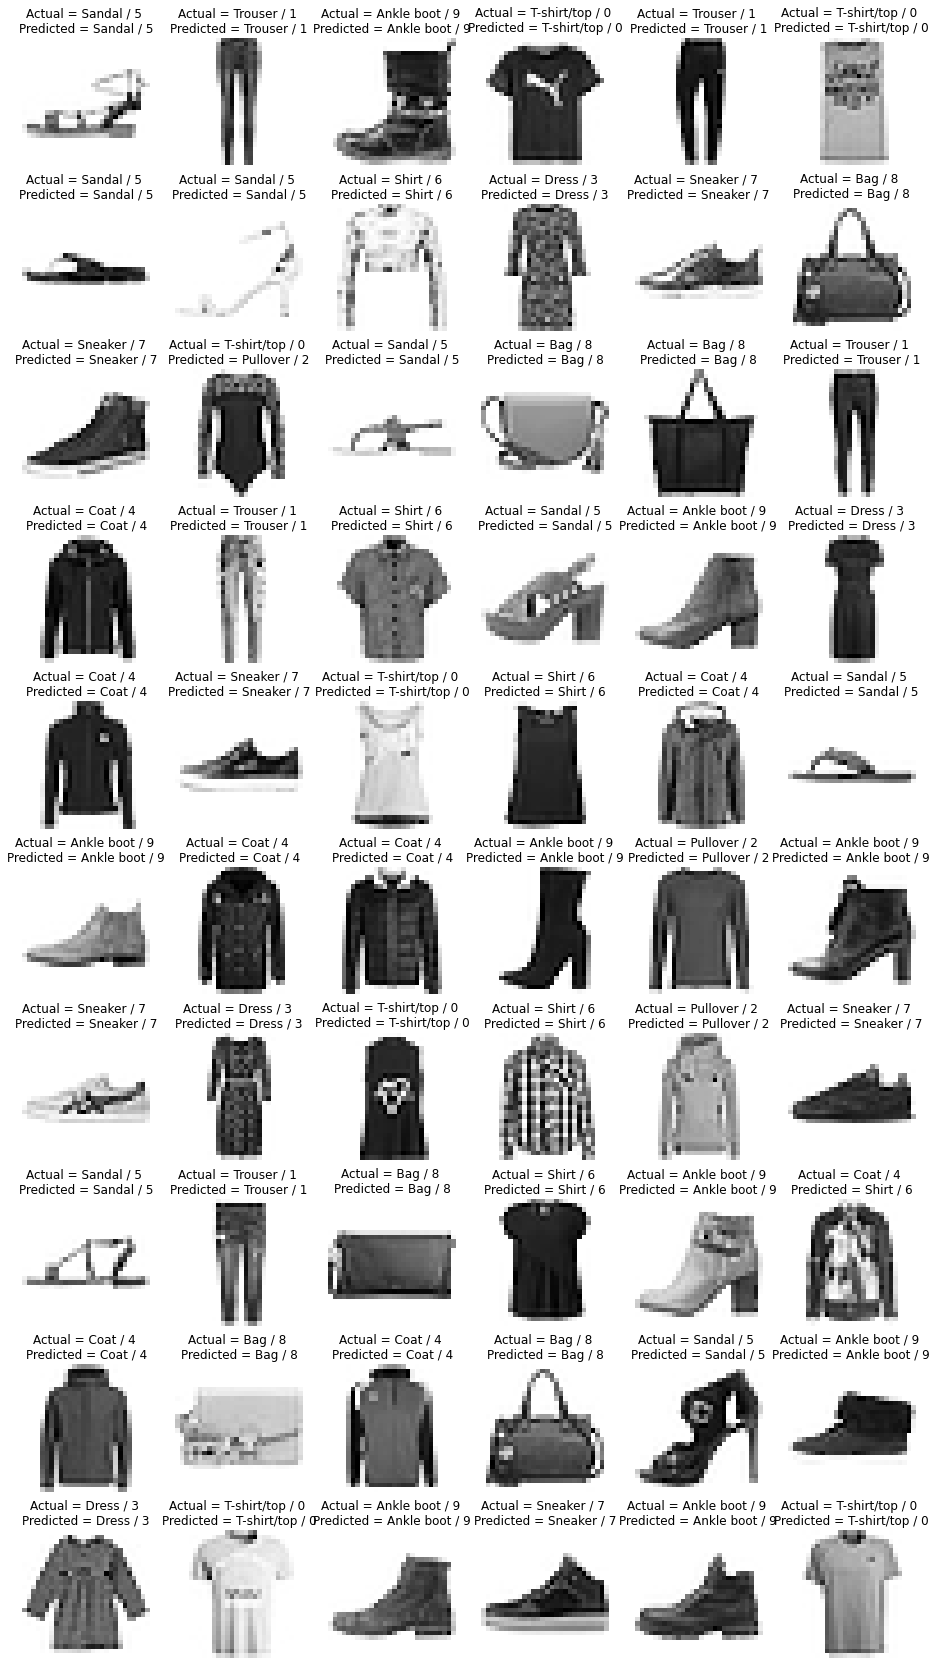

In [71]:
plt.figure(figsize=(16,30))

j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j)
  j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

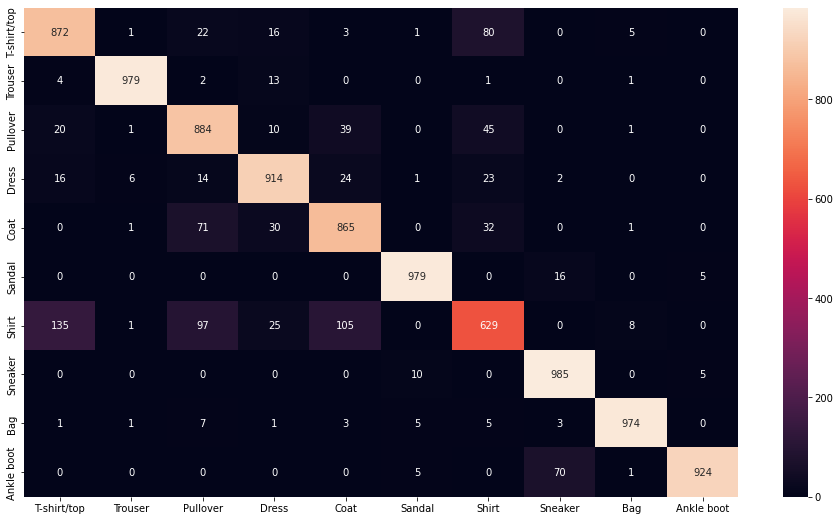

In [152]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

# show cm 
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)

In [153]:
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.87      0.85      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.81      0.88      0.84      1000
       Dress       0.91      0.91      0.91      1000
        Coat       0.83      0.86      0.85      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.77      0.63      0.69      1000
     Sneaker       0.92      0.98      0.95      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.99      0.92      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [154]:
# Save model
cnn_model.save('model.h5')

In [155]:
# Load model
fashion_mnist_cnn_model = tf.keras.models.load_model('model.h5')

In [156]:
Y_pred_sample = fashion_mnist_cnn_model.predict(np.expand_dims(X_test[0], axis=0)).round(2)
np.argmax(Y_pred_sample[0])

9

In [157]:
y_test[0]

9

In [158]:
KERAS_MODEL_NAME = 'model.h5'

In [159]:
keras_model_size = get_file_size(KERAS_MODEL_NAME)

# TENSORFLOW LITE MODEL

In [160]:
TF_LITE_MODEL_FILE_NAME = "tf_lite_model.tflite"

In [161]:
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(cnn_model)
tflite_model = tf_lite_converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmp1bbnpy29/assets


INFO:tensorflow:Assets written to: /tmp/tmp1bbnpy29/assets


In [162]:
tflite_model_name = TF_LITE_MODEL_FILE_NAME
open(tflite_model_name, "wb").write(tflite_model)

643376

In [163]:
convert_bytes(get_file_size(TF_LITE_MODEL_FILE_NAME), "KB")

File size: 628.297 Kilobytes


In [164]:
tflite_file_size = get_file_size(TF_LITE_MODEL_FILE_NAME)

# CHECK INPUT TENSOR SHAPE

In [165]:
interpreter = tf.lite.Interpreter(model_path = TF_LITE_MODEL_FILE_NAME)
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [ 1 28 28  1]
Input Type: <class 'numpy.float32'>
Output Shape: [ 1 10]
Output Type: <class 'numpy.float32'>


# RESIZE TENSOR SHAPE

In [166]:
interpreter.resize_tensor_input(input_details[0]['index'], (10000, 28, 28, 1))
interpreter.resize_tensor_input(output_details[0]['index'], (10000, 10))
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [10000    28    28     1]
Input Type: <class 'numpy.float32'>
Output Shape: [10000    10]
Output Type: <class 'numpy.float32'>


In [167]:
X_test.dtype

dtype('float64')

In [168]:
test_imgs_numpy = np.array(X_test, dtype=np.float32)

In [169]:
test_imgs_numpy.dtype

dtype('float32')

In [170]:
interpreter.set_tensor(input_details[0]['index'], test_imgs_numpy)
interpreter.invoke()
tflite_model_predictions = interpreter.get_tensor(output_details[0]['index'])
print("Prediction results shape:", tflite_model_predictions.shape)
prediction_classes = np.argmax(tflite_model_predictions, axis=1)

Prediction results shape: (10000, 10)


In [171]:
acc = accuracy_score(prediction_classes, y_test)

In [172]:
print('Test accuracy TFLITE model is {}%'.format(round(100*acc, 2)))

Test accuracy TFLITE model is 90.44%


In [173]:
tflite_file_size/keras_model_size

0.32459376336968543

# TF LITE MODEL FLOAT 16

In [174]:
TF_LITE_MODEL_FLOAT_16_FILE_NAME = "tf_lite_float_16_model.tflite"

In [175]:
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(cnn_model)
tf_lite_converter.optimizations = [tf.lite.Optimize.DEFAULT]
tf_lite_converter.target_spec.supported_types = [tf.float16]
tflite_model = tf_lite_converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpnr9h43u1/assets


INFO:tensorflow:Assets written to: /tmp/tmpnr9h43u1/assets


In [176]:
tflite_model_name = TF_LITE_MODEL_FLOAT_16_FILE_NAME
open(tflite_model_name, "wb").write(tflite_model)

325184

In [177]:
convert_bytes(get_file_size(TF_LITE_MODEL_FLOAT_16_FILE_NAME), "KB")

File size: 317.562 Kilobytes


In [178]:
tflite_float_16_file_size = get_file_size(TF_LITE_MODEL_FLOAT_16_FILE_NAME)

In [179]:
tflite_float_16_file_size/keras_model_size

0.1640606711279373

In [180]:
tflite_float_16_file_size/tflite_file_size

0.5054338365123971

# TF LITE SIZE QUANTISED

In [181]:
TF_LITE_SIZE_QUANT_MODEL_FILE_NAME = "tf_lite_quant_model.tflite"

In [183]:
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(cnn_model)
tf_lite_converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = tf_lite_converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpdvl7tasu/assets


INFO:tensorflow:Assets written to: /tmp/tmpdvl7tasu/assets


In [184]:
tflite_model_name = TF_LITE_SIZE_QUANT_MODEL_FILE_NAME
open(tflite_model_name, "wb").write(tflite_model)

168192

In [185]:
convert_bytes(get_file_size(TF_LITE_SIZE_QUANT_MODEL_FILE_NAME), "KB")

File size: 164.25 Kilobytes


In [186]:
tflite_float_quant_file_size = get_file_size(TF_LITE_SIZE_QUANT_MODEL_FILE_NAME)

In [187]:
tflite_float_quant_file_size/keras_model_size

0.08485562757807896

In [188]:
tflite_float_quant_file_size/ tflite_float_16_file_size

0.5172210194843535

# CHECK INPUT TENSOR SHAPE

In [189]:
interpreter = tf.lite.Interpreter(model_path = TF_LITE_SIZE_QUANT_MODEL_FILE_NAME)
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [ 1 28 28  1]
Input Type: <class 'numpy.float32'>
Output Shape: [ 1 10]
Output Type: <class 'numpy.float32'>


# RESIZE TENSOR SHAPE

In [190]:
interpreter.resize_tensor_input(input_details[0]['index'], (10000, 28, 28, 1))
interpreter.resize_tensor_input(output_details[0]['index'], (10000, 10))
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [10000    28    28     1]
Input Type: <class 'numpy.float32'>
Output Shape: [10000    10]
Output Type: <class 'numpy.float32'>


In [191]:
X_test.dtype

dtype('float64')

In [192]:
test_imgs_numpy = np.array(X_test, dtype=np.float32)

In [193]:
test_imgs_numpy.dtype

dtype('float32')

In [194]:
interpreter.set_tensor(input_details[0]['index'], test_imgs_numpy)
interpreter.invoke()
tflite_model_predictions = interpreter.get_tensor(output_details[0]['index'])
print("Prediction results shape:", tflite_model_predictions.shape)
prediction_classes = np.argmax(tflite_model_predictions, axis=1)

Prediction results shape: (10000, 10)


In [195]:
acc = accuracy_score(prediction_classes, y_test)

In [196]:
print('Test accuracy TFLITE model is {}%'.format(round(100*acc, 2)))

Test accuracy TFLITE model is 90.51%
